In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import requests
import json

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Getting our data

In [2]:
response = requests.get('http://creative-recommend-engine.adludio.com/get_data_dump')
todos = json.loads(response.text)

In [3]:
type(todos)

dict

In [4]:
data = todos['game_data']

In [5]:
d = pd.DataFrame(data)
d.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0.0,1.0,1.0
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568.0,23607.0,54873.0
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0.0,6.0,26.0
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0.0,0.0,6.0
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0.0,31.0,85.0


# Preprocessing our data

In [6]:
#we are intrested in the correlation of the region,season & vertical to click-through-event,so we drop the other columns
required_data_df = d.drop(['first_key','version','first_dropped','impression'],axis =1)

# Data Exploration

In [7]:
#checking on statistical summary of our data,numerical columns only
required_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
click-through-event,3272.0,3195.642726,28270.489793,0.0,0.0,1.0,382.25,1240031.0


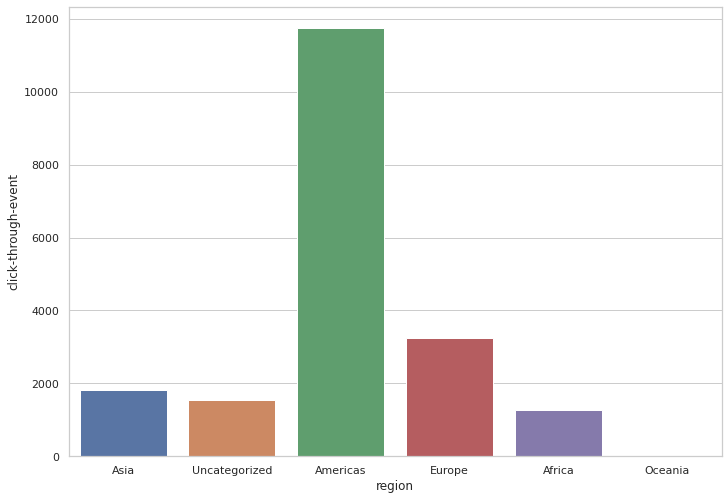

In [8]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="region", y="click-through-event", data=required_data_df,ci=None)

### Observation
* From above,the click through rates was highest in the americas while lowest in Oceania

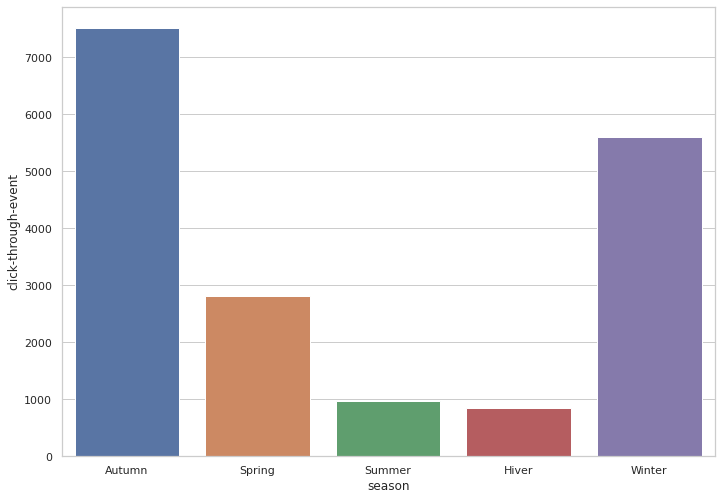

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season", y="click-through-event", data=required_data_df,ci=None)

# Observation
* From above,the click through rates was highest in the Autumn while lowest in Hiver

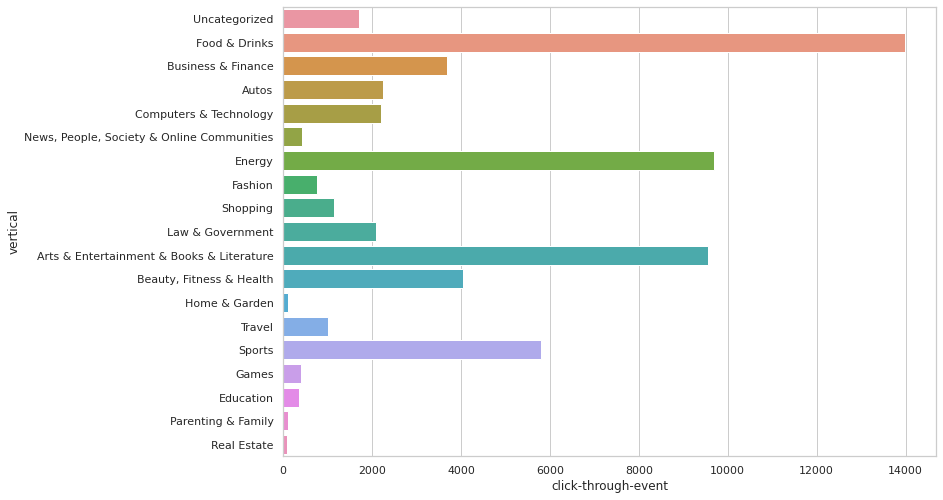

In [10]:

sns.set_theme(style="whitegrid")
ax = sns.barplot(y="vertical", x="click-through-event", data=required_data_df,ci=None)

# Observation
* From above,the click through rates was highest for those who selected Food & Drinks whole lowest in those who selected Real Estate

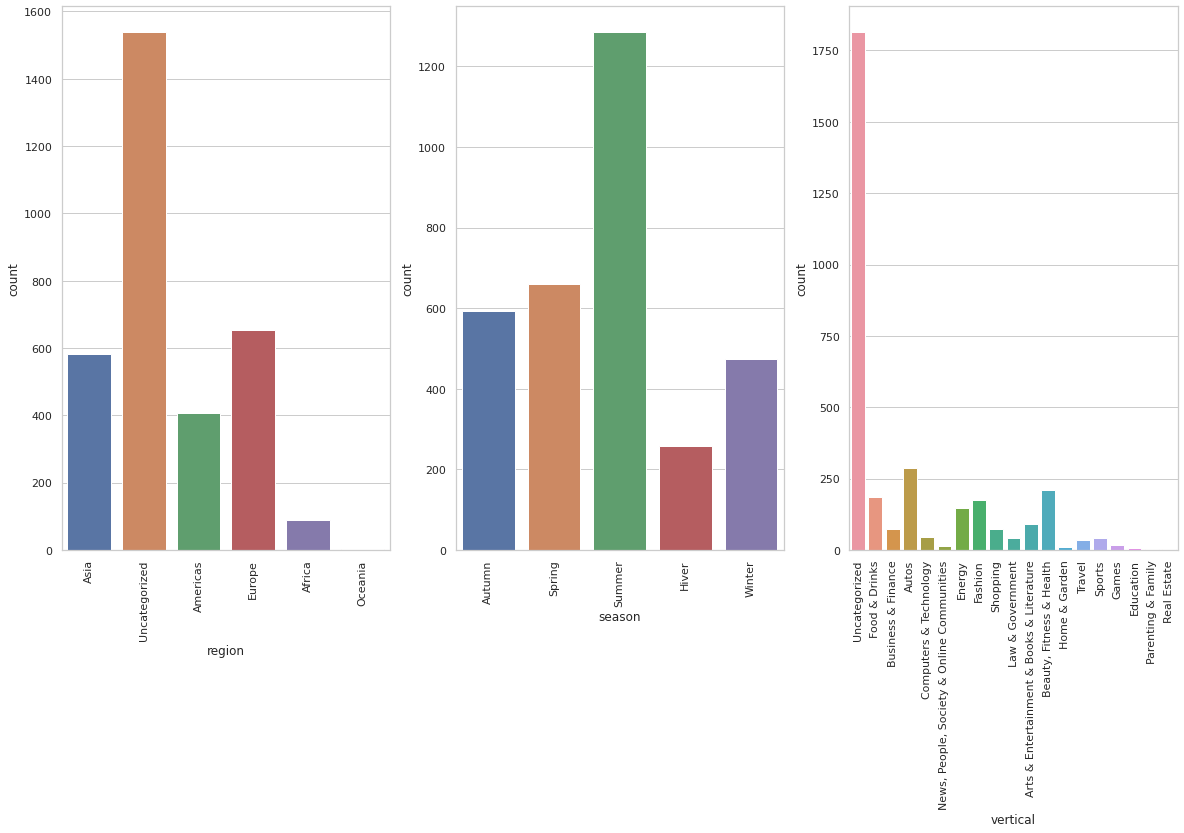

In [11]:
#countplot for each categorical 
fig, ax = plt.subplots(1,3,  figsize=(20,10))
categorical_data = required_data_df.drop(['click-through-event'],axis=1)
for variable, subplot in zip(categorical_data,ax.flatten()):
    sns.countplot(required_data_df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Observation in Regions
* In the given dataset, most users were from Uncategorized regions while oceania still had the lowest representation
* In contrary to the previous visualizations,having a high population does not infer the more click rates. This has to be studied further

### Observation in season
* Summer had the hihgest representation while Hiver had the lowest population presentation,
* Just like with regions,having a high representation in the dataset does not imply a certain group will have more click rates

### Observation in Vertical
* The uncategorized group had the highest presentation still, while real estate had the lowest.
* Real estae also from the previous visualizations had the lowest click rates,but stilll the highest click rates from vertical came from Food & Drinks



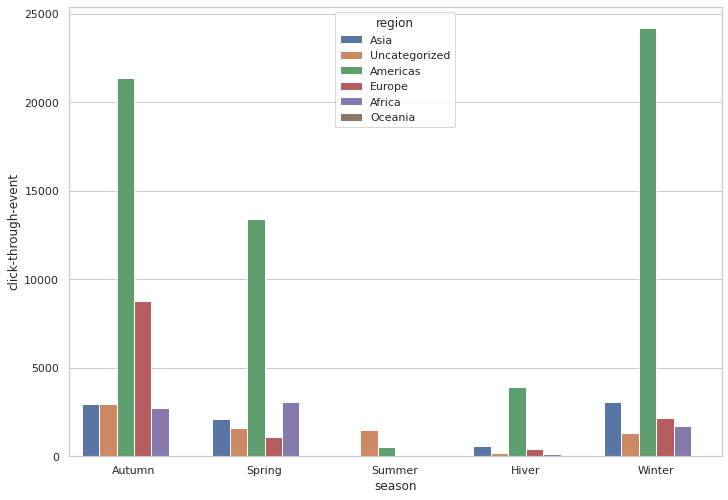

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season", y="click-through-event", data=required_data_df,ci=None,hue='region')

[Text(0, 0, 'Asia'),
 Text(1, 0, 'Uncategorized'),
 Text(2, 0, 'Americas'),
 Text(3, 0, 'Europe'),
 Text(4, 0, 'Africa'),
 Text(5, 0, 'Oceania')]

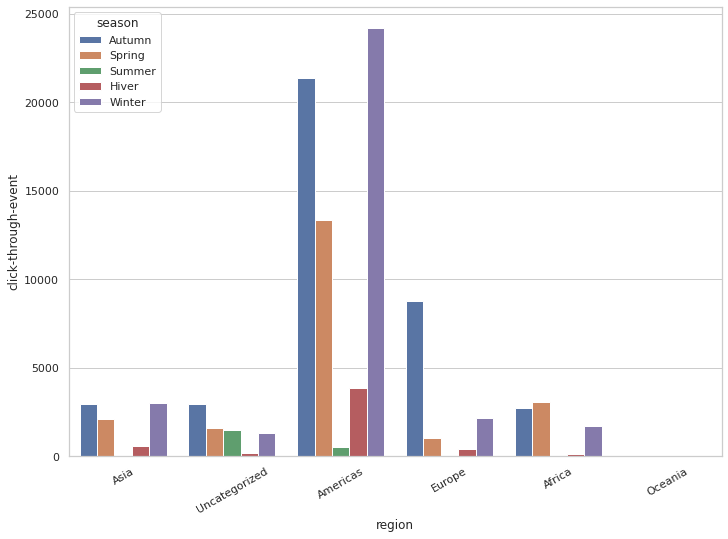

In [13]:


sns.set_theme(style="whitegrid")
ax = sns.barplot(x="region", y="click-through-event", data=required_data_df,ci=None,hue='season')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)